# Building a neural network FROM SCRATCH (no Tensorflow/Pytorch, just numpy & math)

youtube link = https://www.youtube.com/watch?v=w8yWXqWQYmU

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

In [6]:
X_train.shape, Y_train.shape, X_dev.shape, Y_dev.shape

((784, 41000), (41000,), (784, 1000), (1000,))

In [7]:
Y_train

array([3, 7, 6, ..., 1, 6, 9], dtype=int64)

In [14]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2


def ReLU(Z):
    return np.maximum(Z, 0)


def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A


def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


def ReLU_deriv(Z):
    return Z > 0


def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [17]:
def get_predictions(A2):
    return np.argmax(A2, 0)


def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [18]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 100, 0.1)

Iteration:  0
[2 2 2 ... 2 2 2] [3 7 6 ... 1 6 9]
0.10829268292682927
Iteration:  10
[2 4 2 ... 4 2 2] [3 7 6 ... 1 6 9]
0.12878048780487805
Iteration:  20
[2 7 2 ... 4 2 2] [3 7 6 ... 1 6 9]
0.17058536585365855
Iteration:  30
[2 7 2 ... 4 2 7] [3 7 6 ... 1 6 9]
0.20948780487804877
Iteration:  40
[3 7 2 ... 1 2 7] [3 7 6 ... 1 6 9]
0.24792682926829268
Iteration:  50
[3 7 2 ... 1 2 7] [3 7 6 ... 1 6 9]
0.3115121951219512
Iteration:  60
[3 7 2 ... 1 4 7] [3 7 6 ... 1 6 9]
0.3741219512195122
Iteration:  70
[3 7 6 ... 1 0 7] [3 7 6 ... 1 6 9]
0.4170731707317073
Iteration:  80
[3 9 6 ... 1 0 9] [3 7 6 ... 1 6 9]
0.44782926829268294
Iteration:  90
[3 9 6 ... 1 0 9] [3 7 6 ... 1 6 9]
0.4738292682926829


In [19]:
X_train.shape, Y_train.shape

((784, 41000), (41000,))

In [20]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions


def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


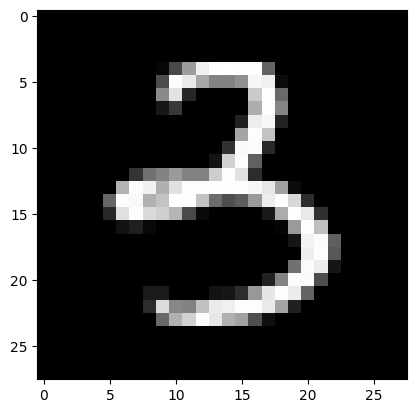

Prediction:  [9]
Label:  7


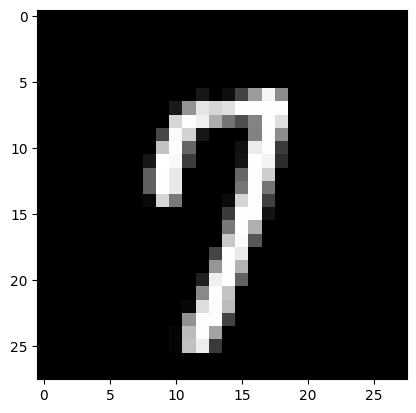

Prediction:  [6]
Label:  6


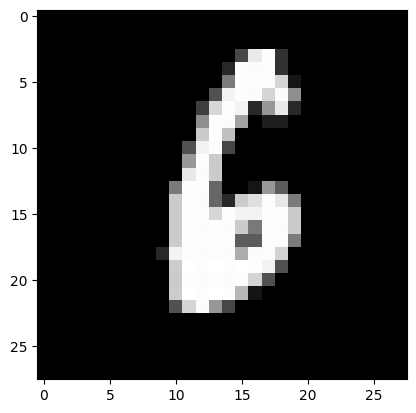

Prediction:  [4]
Label:  3


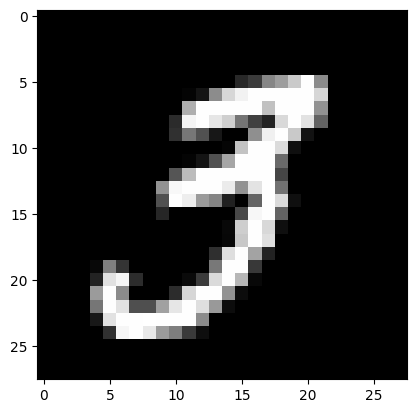

In [21]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [22]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 2 3 1 6 3 7 9 9 8 8 5 9 4 9 8 4 7 1 9 3 7 7 3 7 7 8 1 0 9 5 6 9 0 0 0 8
 8 7 1 8 6 0 8 3 8 2 0 0 1 3 4 2 2 6 9 0 3 7 8 7 8 7 1 1 3 0 1 9 0 8 3 0 4
 4 1 0 3 5 6 6 8 8 6 1 8 6 9 3 7 2 8 6 4 9 3 9 3 2 9 9 3 2 0 6 1 6 0 8 2 6
 0 9 6 7 9 4 7 7 1 7 8 6 4 1 3 4 0 8 9 3 1 6 3 3 8 4 3 4 0 6 3 7 8 7 6 6 9
 4 2 6 1 1 4 0 0 7 8 1 6 0 9 1 7 0 6 0 7 0 3 0 7 0 0 7 3 6 3 0 2 1 7 3 6 7
 9 6 6 0 4 7 6 0 9 7 0 3 6 0 3 3 3 3 3 1 6 9 2 1 2 8 2 0 7 1 9 8 0 6 2 1 2
 8 6 7 3 3 9 9 5 0 0 1 3 1 0 9 6 7 8 0 1 1 6 1 1 1 4 0 8 3 1 7 9 0 1 3 3 9
 0 6 8 1 9 7 3 3 1 3 9 9 6 8 7 6 0 3 1 1 6 9 0 6 8 6 3 1 0 8 6 2 7 1 2 3 7
 6 9 1 3 1 4 3 6 2 6 2 3 6 0 9 6 1 2 7 7 3 0 0 3 7 0 6 3 4 7 1 7 6 6 8 3 7
 1 6 6 6 0 8 7 1 4 3 7 4 4 9 3 2 0 4 0 3 9 3 1 6 3 4 5 3 9 8 3 3 6 6 6 8 1
 5 3 6 0 3 1 8 1 3 6 0 3 0 2 6 3 3 2 6 1 7 2 7 0 8 7 2 7 3 1 6 3 6 8 1 2 6
 8 9 1 7 8 3 7 7 0 7 1 7 8 9 9 4 3 3 1 3 1 7 0 0 3 7 9 9 3 7 0 6 3 1 7 6 1
 3 8 9 6 6 1 6 3 9 4 3 9 3 3 2 0 8 8 0 9 3 1 7 8 3 6 1 2 3 2 7 4 9 6 3 1 1
 9 7 4 1 3 5 4 2 9 5 0 1 

0.507